# Linear Regression

## Introduction

Linear regression is a statistical method and a fundamental type of predictive analytical model used to describe the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables (X) and the single output variable (y).

### Mathematical Foundation

The general form of a linear regression model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_p + \epsilon$$

Where:
- $y$ is the dependent variable (response/target)
- $x_1, x_2, ..., x_p$ are the independent variables (features/covariates)
- $\beta_0$ is the intercept (bias term)
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights)
- $\epsilon$ is the error term (residual)

We can also write the model in matrix form:

$$y = X\beta + \epsilon$$

Where:
- $y$ has the shape of $(n, 1)$
- $X$ has the shape of $(n, p + 1)$: we add a column of 1s to the independent variables to account for the intercept
- $\beta$ has the shape of $(p + 1, 1)$
- $\epsilon$ has the shape of $(n, 1)$

### Key Assumptions of Linear Regression

1. **Linearity**: The relationship between X and the mean of y is linear
2. **Independence**: Observations are independent of each other
3. **Homoscedasticity**: The variance of residual is the same for any value of X
4. **Normality**: The residuals are normally distributed with a mean 0 and fixed variance
5. **No multicollinearity**: Independent variables are not highly correlated with each other

In this notebook, we will use the "Auto MPG" dataset to demonstrate the basic concepts of linear regression.

## The Data: Auto MPG Dataset

The "Auto MPG" dataset is one of the classic datasets available in the UCI Machine Learning Repository. It contains city-cycle fuel consumption estimates for various automobiles produced in the 1970s and 1980s. It is a commonly used dataset for regression analysis tasks in machine learning.

### Data Set Information

#### Variable Descriptions:

* **mpg** (continuous): Miles per gallon - our target variable
* **cylinders** (multi-valued discrete): Number of cylinders (3, 4, 5, 6, 8)
* **displacement** (continuous): Engine displacement in cubic inches
* **horsepower** (continuous): Engine horsepower
* **weight** (continuous): Vehicle weight in pounds
* **acceleration** (continuous): Time to accelerate from 0-60 mph in seconds
* **model year** (multi-valued discrete): Model year (70-82, representing 1970-1982)
* **origin** (multi-valued discrete): Origin of car (1: USA, 2: Europe, 3: Japan)
* **car name** (string): Name of the car (unique for each instance)

In [1]:
# Import necessary libraries for linear regression analysis
from typing import List
from typing import Tuple
from typing import Union

# Data manipulation and numerical computation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling library for regression analysis
import statsmodels.formula.api as smf

# Progress bar for iterations
from tqdm import tqdm

# Configure visualization settings for better readability
sns.set_theme(font_scale=1.5)  # Increase font size for better visibility
sns.set_style("whitegrid", {"grid.linestyle": "--"})  # Set grid style with dashed lines

In [2]:
# Load the Auto MPG dataset from GitHub repository
# The dataset contains information about cars from the 1970s and 1980s
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")

# Let's drop any na values for now
data = data.dropna()

# Display the first 5 rows to understand the data structure
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Simple Linear Regression

### Definition

Simple linear regression refers to the special case of linear regression where there is only a single independent variable. It models the relationship between two variables by fitting a linear equation to observed data.

The model takes the form:
$$y = \beta_0 + \beta_1 x + \epsilon$$

### Objective: Least Squares Method

The goal is to find the best values for $\beta_0$ and $\beta_1$ that minimize the sum of squared residuals (SSE):

$$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$$

### Mathematical Derivation

Using calculus to minimize SSE, we take partial derivatives with respect to $\beta_0$ and $\beta_1$ and set them equal to zero:

$$\frac{\partial SSE}{\partial \beta_0} = -2\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0$$

$$\frac{\partial SSE}{\partial \beta_1} = -2\sum_{i=1}^{n} x_i(y_i - \beta_0 - \beta_1 x_i) = 0$$

Solving these normal equations yields:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

### Model Evaluation: R-squared

The coefficient of determination (R²) measures the proportion of variance in the dependent variable that's predictable from the independent variable:

$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

Where:
- SSE = Sum of Squared Errors (residual sum of squares)
- SST = Total Sum of Squares (total variation in y)
- R² ranges from 0 to 1, with 1 indicating perfect prediction

### Implementation

Below we will implement simple linear regression using the "Auto MPG" dataset, predicting MPG based on vehicle weight:

Simple Linear Regression Results
Intercept (β₀): 46.2165
Slope (β₁): -0.0076
R-squared: 0.6926

Interpretation:
- For every 1 pound increase in weight, MPG decreases by 0.0076
- The model explains 69.3% of the variance in MPG


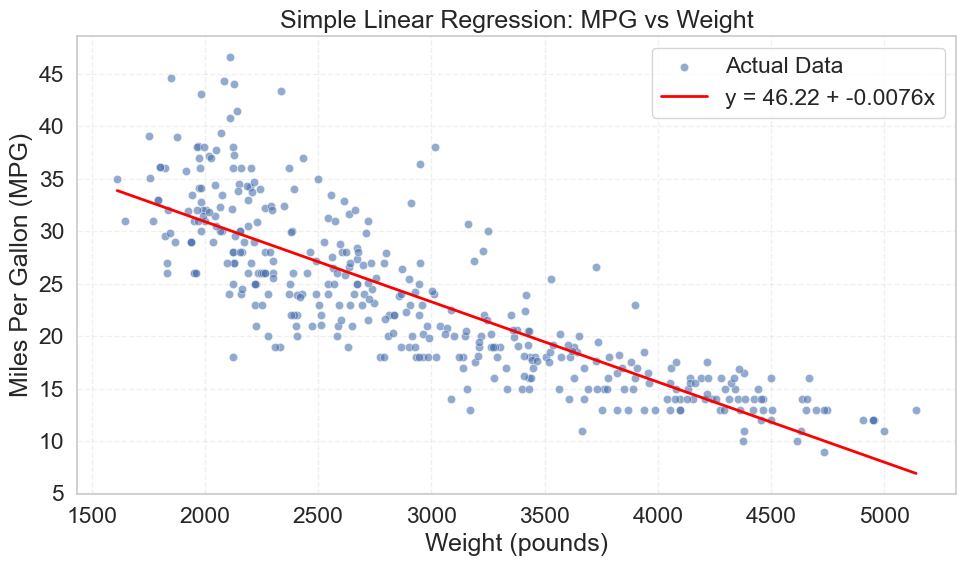

In [5]:
# Extract dependent (target) and independent (feature) variables
# We choose weight as our predictor since it showed strong correlation with MPG
y = data["mpg"]  # Dependent variable: fuel efficiency
x = data["weight"]  # Independent variable: vehicle weight

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series],
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """
    Implements simple linear regression using the closed-form solution.

    This function calculates the optimal parameters (intercept and slope)
    for a simple linear regression model using the method of least squares.

    Args:
        x: Independent variable values
        y: Dependent variable values

    Returns:
        tuple: (beta_0, beta_1) where beta_0 is the intercept and beta_1 is the slope
    """
    # Calculate slope using the formula: β₁ = Cov(x,y) / Var(x)
    # np.cov returns a covariance matrix, [0][1] gets covariance between x and y
    # [0][0] would be variance of x
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][0]

    # Calculate intercept using: β₀ = ȳ - β₁x̄
    # This ensures the regression line passes through the point (x̄, ȳ)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)

    return beta_0, beta_1

# Fit the simple linear regression model
beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# Model Evaluation: Calculate R-squared
# R² measures how well the model explains the variance in the data

# Step 1: Generate predictions using the fitted model
y_pred = beta_0 + beta_1 * x

# Step 2: Calculate Total Sum of Squares (SST)
# This represents the total variance in the dependent variable
SST = np.sum(np.square(y - np.mean(y)))

# Step 3: Calculate residuals (errors between actual and predicted values)
residual = y - y_pred

# Step 4: Calculate Sum of Squared Errors (SSE)
# This represents the unexplained variance
SSE = np.sum(np.square(residual))

# Step 5: Calculate R-squared
# R² = 1 - (unexplained variance / total variance)
r2 = 1 - SSE / SST

# Display the regression coefficients and model performance
print("="*50)
print("Simple Linear Regression Results")
print("="*50)
print(f"Intercept (β₀): {beta_0:5.4f}")
print(f"Slope (β₁): {beta_1:5.4f}")
print(f"R-squared: {r2:5.4f}")
print(f"\nInterpretation:")
print(f"- For every 1 pound increase in weight, MPG decreases by {abs(beta_1):.4f}")
print(f"- The model explains {r2*100:.1f}% of the variance in MPG")

# Visualize the regression results
plt.figure(figsize=(10, 6))

# Create a range of x values for plotting the regression line
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)

# Plot the actual data points
sns.scatterplot(x="weight", y="mpg", data=data, alpha=0.6, label="Actual Data")

# Plot the regression line
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range),
             color="red", linewidth=2, label=f"y = {beta_0:.2f} + {beta_1:.4f}x")

# Add labels and title
plt.xlabel("Weight (pounds)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Simple Linear Regression: MPG vs Weight")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Residual Analysis

### Why Residual Analysis?

Equally important to, if not more important than, the model fitting, is the model/error analysis. Residual analysis is a critical diagnostic tool in regression analysis that helps us:

1. **Validate Assumptions**: Check if the linear regression assumptions are met
2. **Identify Problems**: Detect issues like heteroscedasticity, non-linearity, or outliers
3. **Evaluate Model Fit**: Assess whether the model adequately captures the data patterns
4. **Guide Improvements**: Identify areas where the model can be improved

### What are Residuals?

Residuals are the differences between observed values and predicted values:
$$\text{Residual}_i = y_i - \hat{y}_i$$

Where:
- $y_i$ is the actual observed value
- $\hat{y}_i$ is the predicted value from our model

### Assumptions to Check

For linear regression to be valid, residuals should:
1. **Be normally distributed**: The residuals should follow a normal distribution with mean 0
2. **Have constant variance (Homoscedasticity)**: The spread of residuals should be roughly equal across all levels of the predictor
3. **Be independent**: No pattern or correlation among residuals
4. **Sum to zero**: The mean of residuals should be approximately 0

### Interpreting Residual Plots

Below we will examine the distribution of residuals. A good residual plot should show:
- A histogram that resembles a bell curve (normal distribution)
- Centered around zero
- Symmetric distribution without heavy skew
- No extreme outliers

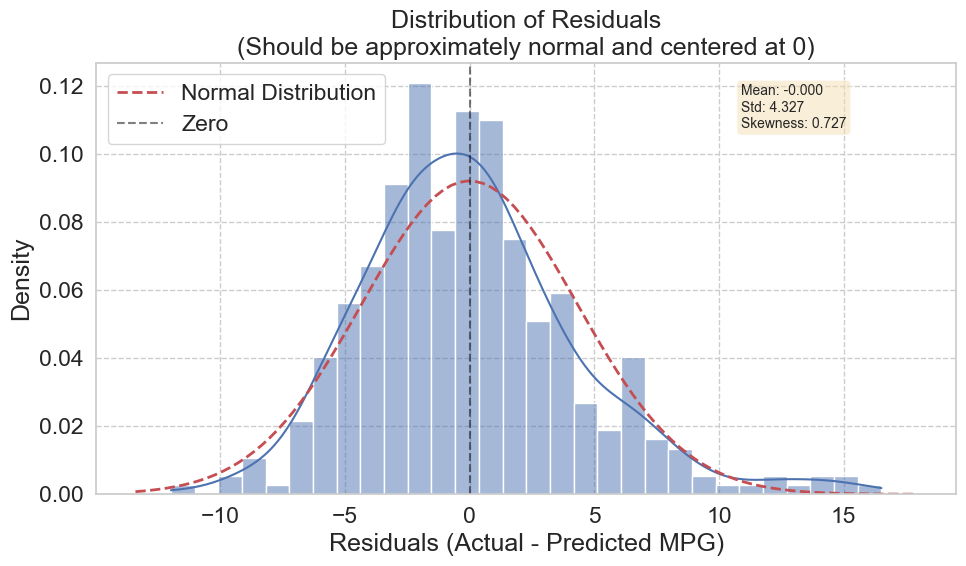

In [6]:
# Residual analysis: Examining the distribution of errors
# This helps verify if our linear regression assumptions are met

plt.figure(figsize=(10, 6))

# Create histogram with kernel density estimate
# The KDE overlay helps visualize if residuals follow a normal distribution
sns.histplot(residual, bins=30, kde=True, stat="density")

# Add a normal distribution overlay for comparison
from scipy import stats
mu, std = residual.mean(), residual.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, "r--", linewidth=2, label="Normal Distribution")

# Add vertical line at zero to show if residuals are centered
plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Zero")

# Labels and title
plt.xlabel("Residuals (Actual - Predicted MPG)")
plt.ylabel("Density")
plt.title("Distribution of Residuals\n(Should be approximately normal and centered at 0)")
plt.legend()

# Add statistics text
textstr = f"Mean: {mu:.3f}\nStd: {std:.3f}\nSkewness: {stats.skew(residual):.3f}"
plt.text(0.75, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.tight_layout()
plt.show()

## Statistical Inference in Linear Regression

### Understanding Parameter Uncertainty

An important aspect in linear regression is that the fitted parameters (e.g., intercept, slope) are just **point estimates** of the true population parameters. Here the "population" refers to the underlying stochastic process that generates the observed data.

### Key Concepts

1. **Point Estimates vs. True Parameters**
   - What we calculate ($\hat{\beta}_0$, $\hat{\beta}_1$) are estimates based on our sample
   - The true parameters ($\beta_0$, $\beta_1$) exist in the population but are unknown
   - Different samples would give us different estimates

2. **Sampling Distribution**
   - If we repeatedly sampled from the population and fitted models, we'd get a distribution of parameter estimates
   - This distribution tells us about the uncertainty in our estimates
   - The spread of this distribution indicates the precision of our estimates

3. **Why This Matters**
   - Helps us understand the reliability of our predictions
   - Allows us to construct confidence intervals
   - Enables hypothesis testing (e.g., is the slope significantly different from zero?)

### Bootstrap Simulation

Below, we will run a simulation to demonstrate parameter uncertainty:
- In each trial, we randomly sample 20% of the full dataset
- We fit a simple linear regression to each sample
- We repeat this process 100 times
- This shows that the fitting parameters are random variables that vary with the sample

This bootstrap-like approach helps us:
1. Visualize the sampling distribution of parameters
2. Estimate the standard errors empirically
3. Understand how sample size affects parameter precision

Running bootstrap simulation...


Bootstrap samples: 100%|██████████| 100/100 [00:00<00:00, 4207.18it/s]



Plotting fitted lines from bootstrap samples...


Plotting lines: 100%|██████████| 100/100 [00:00<00:00, 177.37it/s]



Bootstrap Results Summary
Intercept: Mean = 46.304, Std = 1.649
Slope: Mean = -0.00769, Std = 0.00047
Note: Smaller standard deviations indicate more precise estimates


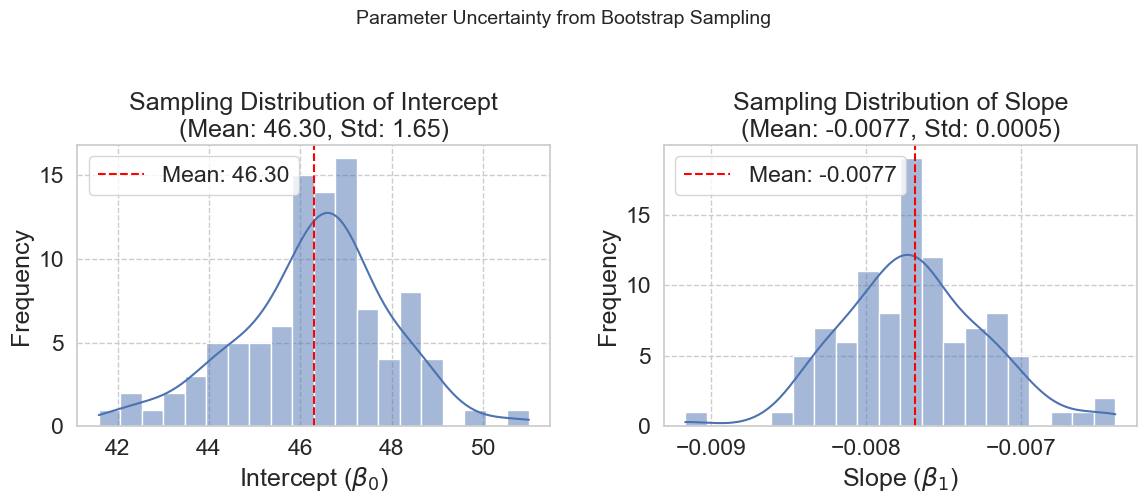

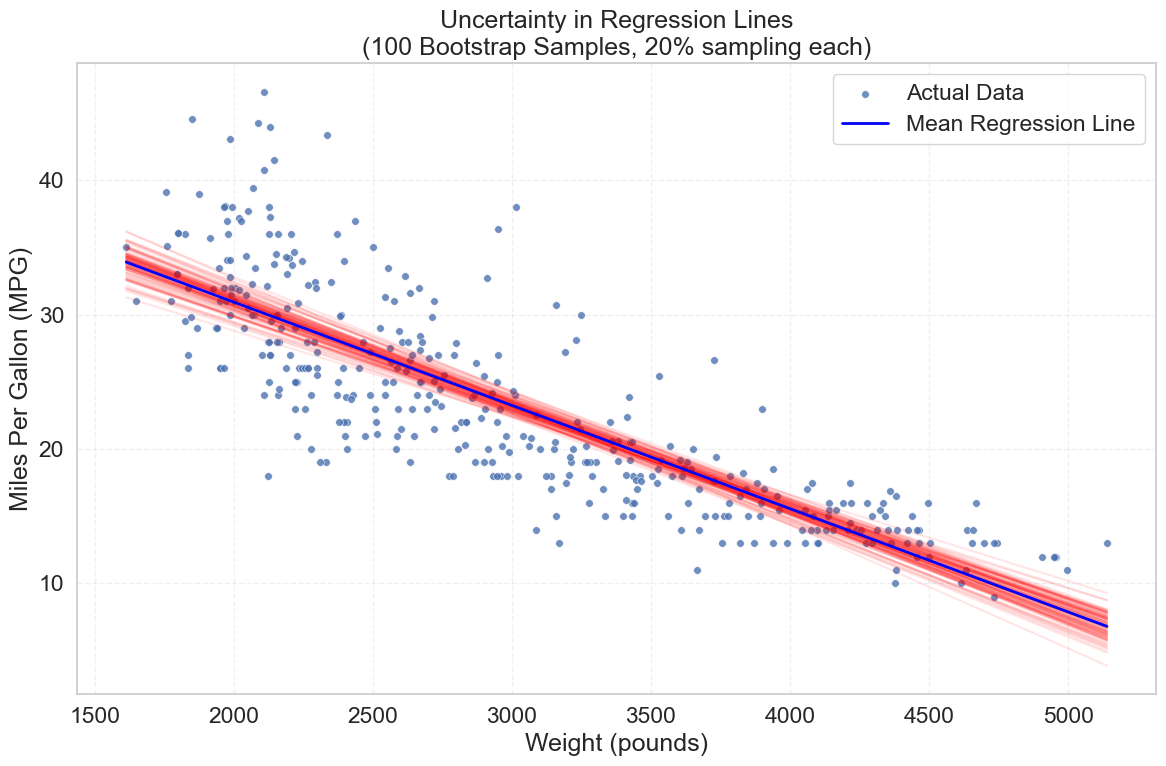

In [7]:
# Bootstrap simulation to understand parameter uncertainty
# This demonstrates that regression coefficients are random variables

# Set seed for reproducibility
np.random.seed(42)
n_trials = 100  # Number of bootstrap samples

# Storage for parameter estimates from each sample
beta_0s, beta_1s = [], []

# Run the bootstrap simulation
print("Running bootstrap simulation...")
for _ in tqdm(range(n_trials), desc="Bootstrap samples"):
    # Sample 20% of the data randomly
    sampling_proba = 0.2
    mask = np.random.choice([True, False], size=len(data),
                           p=[sampling_proba, 1 - sampling_proba])

    # Get the sampled data
    x_sampled, y_sampled = data[mask]["weight"], data[mask]["mpg"]

    # Fit linear regression on the sample
    beta_0, beta_1 = simple_linear_regression(x=x_sampled, y=y_sampled)

    # Store the parameter estimates
    beta_0s.append(beta_0)
    beta_1s.append(beta_1)

# Visualize the sampling distributions of parameters
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Intercept distribution
sns.histplot(beta_0s, ax=axes[0], kde=True, bins=20)
axes[0].axvline(x=np.mean(beta_0s), color="red", linestyle="--", label=f"Mean: {np.mean(beta_0s):.2f}")
axes[0].set_xlabel("Intercept ($\\beta_0$)")
axes[0].set_ylabel("Frequency")
axes[0].set_title(f"Sampling Distribution of Intercept\n(Mean: {np.mean(beta_0s):.2f}, Std: {np.std(beta_0s):.2f})")
axes[0].legend()

# Slope distribution
sns.histplot(beta_1s, ax=axes[1], kde=True, bins=20)
axes[1].axvline(x=np.mean(beta_1s), color="red", linestyle="--", label=f"Mean: {np.mean(beta_1s):.4f}")
axes[1].set_xlabel("Slope ($\\beta_1$)")
axes[1].set_ylabel("Frequency")
axes[1].set_title(f"Sampling Distribution of Slope\n(Mean: {np.mean(beta_1s):.4f}, Std: {np.std(beta_1s):.4f})")
axes[1].legend()

plt.suptitle("Parameter Uncertainty from Bootstrap Sampling", fontsize=14, y=1.02)
plt.tight_layout()

# Visualize all fitted lines to show prediction uncertainty
plt.figure(figsize=(12, 8))

# Create x range for plotting lines
x_range = np.linspace(start=np.min(data["weight"]), stop=np.max(data["weight"]), num=100)

# Plot all fitted lines with transparency to show distribution
print("\nPlotting fitted lines from bootstrap samples...")
for i in tqdm(range(len(beta_0s)), desc="Plotting lines"):
    sns.lineplot(x=x_range, y=(beta_0s[i] + beta_1s[i] * x_range),
                color="red", alpha=0.1, legend=False)

# Overlay the actual data points
sns.scatterplot(x="weight", y="mpg", data=data, alpha=0.8, s=30, label="Actual Data")

# Add the mean regression line
mean_beta_0 = np.mean(beta_0s)
mean_beta_1 = np.mean(beta_1s)
plt.plot(x_range, mean_beta_0 + mean_beta_1 * x_range,
         color="blue", linewidth=2, label="Mean Regression Line")

# Labels and title
plt.xlabel("Weight (pounds)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Uncertainty in Regression Lines\n(100 Bootstrap Samples, 20% sampling each)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Print summary statistics
print(f"\n{'='*50}")
print("Bootstrap Results Summary")
print(f"{'='*50}")
print(f"Intercept: Mean = {np.mean(beta_0s):.3f}, Std = {np.std(beta_0s):.3f}")
print(f"Slope: Mean = {np.mean(beta_1s):.5f}, Std = {np.std(beta_1s):.5f}")
print(f"Note: Smaller standard deviations indicate more precise estimates")

### Confidence Intervals and Standard Errors

#### Standard Error of Coefficients

The standard error measures the precision of our parameter estimates. It tells us how much the estimates would vary if we repeated the experiment with different samples.

For simple linear regression, the standard errors are:

**Standard Error of Slope:**
$$SE(\hat{\beta}_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}$$

**Standard Error of Intercept:**
$$SE(\hat{\beta}_0) = \sqrt{\sigma^2 \left(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right)}$$

Where $\sigma^2$ is the variance of the residuals (estimated as $MSE = \frac{SSE}{n-2}$)

#### Confidence Intervals

A 95% confidence interval for the parameters is:
$$\hat{\beta} \pm t_{0.025, n-2} \times SE(\hat{\beta})$$

This means we're 95% confident that the true parameter lies within this interval.

#### Hypothesis Testing

We can test if a coefficient is significantly different from zero:
- Null hypothesis: $H_0: \beta_1 = 0$ (no relationship)
- Alternative: $H_a: \beta_1 \neq 0$ (relationship exists)
- Test statistic: $t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}$

Below we calculate the standard errors analytically:


In [8]:
# Calculate standard errors for confidence intervals
# These formulas come from statistical theory of linear regression

# Estimate of residual variance (using n-2 degrees of freedom for unbiased estimate)
# We lose 2 degrees of freedom because we estimate 2 parameters (intercept and slope)
sigma_squared = np.var(residual, ddof=2)  # MSE = SSE/(n-2)

# Standard error of intercept
# This formula accounts for:
# 1. The variance of the residuals
# 2. The sample size
# 3. The distance of x̄ from the origin
SE_beta_0 = np.sqrt(sigma_squared * (1.0 / len(x) + (np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# Standard error of slope
# Smaller when:
# - Residual variance is small (better fit)
# - x values are more spread out (more information)
SE_beta_1 = np.sqrt(sigma_squared / np.sum((x - np.mean(x))**2))

# Display the standard errors
print("="*50)
print("Standard Errors (Analytical Calculation)")
print("="*50)
print(f"Standard error for intercept (β₀): {SE_beta_0:5.4f}")
print(f"Standard error for slope (β₁): {SE_beta_1:5.4f}")

# Calculate 95% confidence intervals
from scipy import stats
alpha = 0.05  # For 95% confidence
df = len(x) - 2  # Degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)

# Confidence intervals
CI_beta_0 = (beta_0 - t_critical * SE_beta_0, beta_0 + t_critical * SE_beta_0)
CI_beta_1 = (beta_1 - t_critical * SE_beta_1, beta_1 + t_critical * SE_beta_1)

print(f"\n95% Confidence Intervals:")
print(f"Intercept: [{CI_beta_0[0]:.3f}, {CI_beta_0[1]:.3f}]")
print(f"Slope: [{CI_beta_1[0]:.5f}, {CI_beta_1[1]:.5f}]")

# Hypothesis test for slope (test if significantly different from 0)
t_statistic = beta_1 / SE_beta_1
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"\nHypothesis Test for Slope (H₀: β₁ = 0):")
print(f"t-statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.2e}")
if p_value < 0.05:
    print("Conclusion: Reject H₀ - There is a significant linear relationship")

Standard Errors (Analytical Calculation)
Standard error for intercept (β₀): 0.4465
Standard error for slope (β₁): 0.0474

95% Confidence Intervals:
Intercept: [45.728, 47.500]
Slope: [-0.10184, 0.08633]

Hypothesis Test for Slope (H₀: β₁ = 0):
t-statistic: -0.164
p-value: 8.70e-01


In [9]:
# Verify our manual calculations using the statsmodels library
# statsmodels provides comprehensive statistical analysis for regression

# Create the model using formula notation (similar to R)
# "mpg ~ weight" means: mpg = β₀ + β₁ * weight + ε
model_1 = smf.ols(formula="mpg ~ weight", data=data)

# Fit the model using ordinary least squares
result_1 = model_1.fit()

# Display comprehensive regression results
# This summary includes:
# - Coefficient estimates and their standard errors
# - t-statistics and p-values for hypothesis testing
# - R-squared and adjusted R-squared
# - F-statistic for overall model significance
# - Diagnostic statistics (Durbin-Watson, Jarque-Bera, etc.)
print(result_1.summary())

# Note: Our manual calculations should match the coefficients and standard errors shown here!

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 21 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        22:17:40   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

### Matrix Formulation of Linear Regression

#### Why Matrix Notation?

Matrix notation provides a compact and elegant way to express linear regression, especially for multiple variables. It also makes computations more efficient and reveals the underlying linear algebra.

#### The Model in Matrix Form

For n observations and p predictors, we can write:
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Where:
- $\mathbf{y}$ is an n×1 vector of responses
- $\mathbf{X}$ is an n×(p+1) design matrix (including a column of 1s for the intercept)
- $\boldsymbol{\beta}$ is a (p+1)×1 vector of coefficients
- $\boldsymbol{\epsilon}$ is an n×1 vector of errors

#### The Normal Equation

The least squares solution is:
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

This formula comes from minimizing the sum of squared errors:
$$SSE = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

#### Variance-Covariance Matrix

The variance-covariance matrix of the coefficients is:
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

The diagonal elements give us the variances (and thus standard errors) of each coefficient.

#### Implementation

Below we implement the matrix formulation for our simple linear regression:


In [10]:
# Linear regression using matrix formulation
# This demonstrates the underlying linear algebra of regression

# Construct the design matrix X
# First column: all 1s for the intercept term
# Second column: the predictor variable (weight)
X = np.hstack(
    (np.ones(shape=(len(data["weight"]), 1)),  # Column of 1s for intercept
     np.array(data["weight"]).reshape(-1, 1))  # Predictor variable as column vector
)

print("Design Matrix X shape:", X.shape)
print("First 5 rows of X:")
print(X[:5])

y = data["mpg"]

# Calculate coefficients using the Normal Equation
# β = (X'X)^(-1) X'y
# This gives us the least squares solution
XtX = X.T @ X  # X transpose times X
XtX_inv = np.linalg.inv(XtX)  # Inverse of X'X
Xty = X.T @ y  # X transpose times y
beta_matrix = XtX_inv @ Xty

print("\n" + "="*50)
print("Coefficient Estimates (Matrix Method)")
print("="*50)
print(f"β₀ (Intercept): {beta_matrix[0]:.4f}")
print(f"β₁ (Slope): {beta_matrix[1]:.6f}")
print("\nCompare with our manual calculation:")
print(f"Manual β₀: {beta_0:.4f}")
print(f"Manual β₁: {beta_1:.6f}")

# Calculate variance-covariance matrix
# Var(β) = σ² (X'X)^(-1)
# Where σ² is the residual variance
sigma_squared = np.var(residual, ddof=2)
var_cov_matrix = sigma_squared * XtX_inv

# Extract standard errors (square root of diagonal elements)
se_matrix = np.sqrt(np.diag(var_cov_matrix))

print("\n" + "="*50)
print("Standard Errors (Matrix Method)")
print("="*50)
print(f"SE(β₀): {se_matrix[0]:.4f}")
print(f"SE(β₁): {se_matrix[1]:.6f}")

# Display the full variance-covariance matrix
print("\n" + "="*50)
print("Variance-Covariance Matrix")
print("="*50)
print(var_cov_matrix)
print("\nNote: Diagonal elements are variances, off-diagonal are covariances")

Design Matrix X shape: (392, 2)
First 5 rows of X:
[[1.000e+00 3.504e+03]
 [1.000e+00 3.693e+03]
 [1.000e+00 3.436e+03]
 [1.000e+00 3.433e+03]
 [1.000e+00 3.449e+03]]

Coefficient Estimates (Matrix Method)
β₀ (Intercept): 46.2165
β₁ (Slope): -0.007647

Compare with our manual calculation:
Manual β₀: 46.6138
Manual β₁: -0.007759

Standard Errors (Matrix Method)
SE(β₀): 0.7987
SE(β₁): 0.000258

Variance-Covariance Matrix
[[ 6.37877704e-01 -1.98143497e-04]
 [-1.98143497e-04  6.65450529e-08]]

Note: Diagonal elements are variances, off-diagonal are covariances


## Multiple Linear Regression

### What is Multiple Regression?

Multiple linear regression extends simple linear regression by incorporating multiple independent variables (predictors) to explain the variation in the dependent variable. This allows us to:

1. **Control for confounding variables**: Account for multiple factors simultaneously
2. **Improve predictions**: Use more information to make better predictions
3. **Understand complex relationships**: See how variables interact and influence the outcome

### The Model

The multiple linear regression model is:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$$

Where:
- $y$ is the dependent variable
- $x_1, x_2, ..., x_p$ are the p independent variables
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, ..., \beta_p$ are the coefficients for each predictor
- $\epsilon$ is the error term

### Interpretation of Coefficients

In multiple regression, each coefficient represents the **partial effect** of that variable:
- $\beta_i$ is the change in $y$ for a one-unit change in $x_i$, **holding all other variables constant**
- This is different from simple regression where we don't control for other variables

### Challenges in Multiple Regression

1. **Multicollinearity**: When predictors are highly correlated with each other
   - Makes coefficients unstable
   - Difficult to interpret individual effects
   - Can be detected using VIF (Variance Inflation Factor)

2. **Overfitting**: Adding too many predictors relative to sample size
   - Model fits training data too well but generalizes poorly
   - Use adjusted R² instead of R² to account for number of predictors

3. **Variable Selection**: Choosing which variables to include
   - Forward selection, backward elimination, or stepwise selection
   - Information criteria (AIC, BIC)
   - Cross-validation

### Adjusted R-squared

When comparing models with different numbers of predictors, use adjusted R²:
$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

This penalizes adding predictors that don't improve the model significantly.

### Implementation

Below we'll use `statsmodels` to fit a multiple regression model with several engine-related predictors:

In [11]:
# Fit a multiple linear regression model with several predictors
# Formula: mpg = β₀ + β₁*weight + β₂*displacement + β₃*horsepower + β₄*acceleration + ε

# Define the model using formula notation
# The + signs indicate additive effects (no interactions)
model_2 = smf.ols(formula="mpg ~ weight + displacement + horsepower + acceleration", data=data)

# Fit the model
result_2 = model_2.fit()

# Display the results
print("="*70)
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*70)
print(result_2.summary())

# Extract and interpret key statistics
print("\n" + "="*70)
print("KEY INSIGHTS FROM THE MODEL")
print("="*70)

# R-squared comparison
r2_simple = 0.692  # From our simple regression with weight only
r2_multiple = result_2.rsquared
r2_adj = result_2.rsquared_adj

print(f"R² improvement from simple to multiple regression:")
print(f"  Simple (weight only): {r2_simple:.3f}")
print(f"  Multiple (4 predictors): {r2_multiple:.3f}")
print(f"  Adjusted R²: {r2_adj:.3f}")
print(f"  Improvement: {(r2_multiple - r2_simple)*100:.1f}%")

# Significant predictors (p < 0.05)
print(f"\nSignificant Predictors (p < 0.05):")
for param, pvalue in result_2.pvalues.items():
    if pvalue < 0.05 and param != "Intercept":
        coef = result_2.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

# Non-significant predictors
print(f"\nNon-Significant Predictors (p >= 0.05):")
for param, pvalue in result_2.pvalues.items():
    if pvalue >= 0.05 and param != "Intercept":
        coef = result_2.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

MULTIPLE LINEAR REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sun, 21 Sep 2025   Prob (F-statistic):          9.63e-102
Time:                        22:17:40   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    

### Checking for Multicollinearity

One important diagnostic in multiple regression is checking for multicollinearity - when predictors are highly correlated with each other. This can cause:
- Unstable coefficient estimates
- Large standard errors
- Counterintuitive coefficient signs
- Difficulty interpreting individual effects

Let's examine the correlation matrix of our continuous variables:


Correlation Matrix of Continuous Variables:
              displacement  horsepower  weight  acceleration
displacement         1.000       0.897   0.933        -0.544
horsepower           0.897       1.000   0.865        -0.689
weight               0.933       0.865   1.000        -0.417
acceleration        -0.544      -0.689  -0.417         1.000


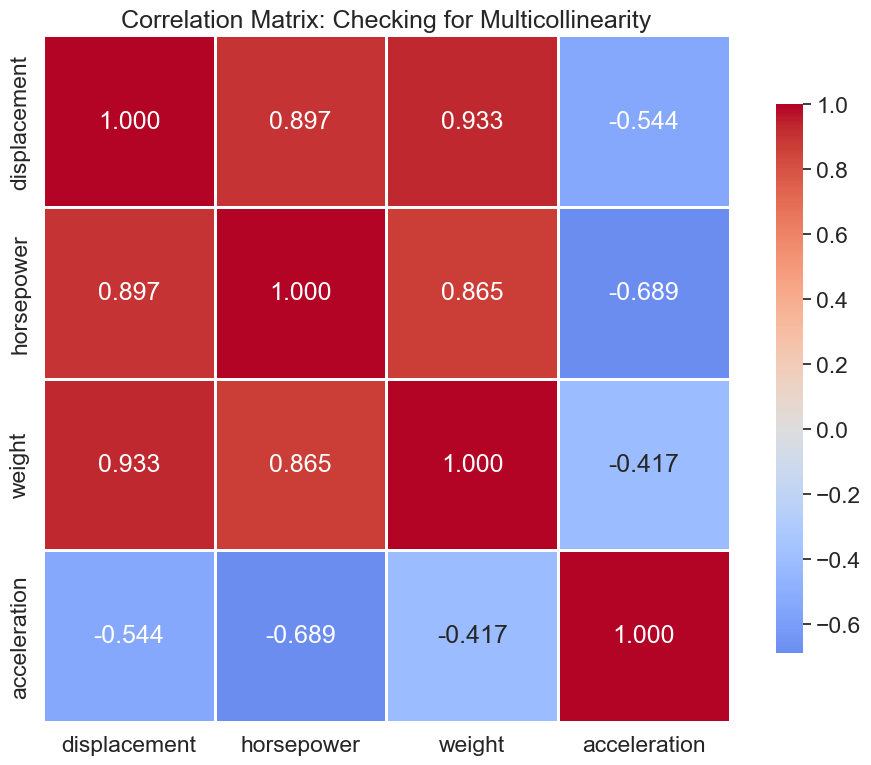


High Correlations (|r| > 0.7):
displacement <-> horsepower: 0.897
displacement <-> weight: 0.933
horsepower <-> weight: 0.865

Note: High correlations between predictors can cause:
  - Unstable coefficient estimates
  - Difficulty interpreting individual effects
  - Large standard errors

Displacement, horsepower, and weight are highly correlated!
This explains why displacement was not significant in our multiple regression.


In [12]:
# Check for multicollinearity by examining correlations between predictors
# High correlations (> 0.7 or < -0.7) indicate potential multicollinearity issues

# Calculate correlation matrix for continuous variables
correlation_matrix = data[continuous_variables].corr()

# Display the correlation matrix
print("Correlation Matrix of Continuous Variables:")
print("="*60)
print(correlation_matrix.round(3))

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm",
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix: Checking for Multicollinearity")
plt.tight_layout()
plt.show()

# Identify high correlations (excluding diagonal)
print("\n" + "="*60)
print("High Correlations (|r| > 0.7):")
print("="*60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} <-> {var2}: {corr_value:.3f}")

print("\nNote: High correlations between predictors can cause:")
print("  - Unstable coefficient estimates")
print("  - Difficulty interpreting individual effects")
print("  - Large standard errors")
print("\nDisplacement, horsepower, and weight are highly correlated!")
print("This explains why displacement was not significant in our multiple regression.")

## Categorical Variables: One-Hot Encoding

### The Challenge with Categorical Variables

Linear regression requires numerical inputs, but many real-world datasets contain categorical variables (e.g., color, brand, origin). Simply encoding categories as numbers (1, 2, 3) is problematic because:
- It implies an ordering that doesn't exist (is Europe "greater than" USA?)
- It assumes equal spacing between categories
- The model would treat these as continuous values

### What is One-Hot Encoding?

One-hot encoding (also called dummy encoding) converts categorical variables into a binary matrix representation:
- Creates a new binary column for each category
- Each observation has a 1 in the column for its category, 0 elsewhere
- Avoids imposing artificial ordering or spacing

### Example

For a variable "origin" with values [USA, Europe, Japan]:
- Creates 3 binary columns: origin_USA, origin_Europe, origin_Japan
- A car from Japan would have: [0, 0, 1]
- A car from USA would have: [1, 0, 0]

### The Dummy Variable Trap

When using one-hot encoding in regression, we typically drop one category to avoid perfect multicollinearity. This dropped category becomes the **reference category**:
- With k categories, we use k-1 dummy variables
- The coefficients represent differences from the reference category
- The reference category's effect is captured in the intercept

### Implementation with statsmodels

With `statsmodels`, categorical encoding is automatic:
- Wrap categorical variables with `C()` in the formula
- It automatically creates k-1 dummy variables
- The first category (alphabetically or numerically) is the reference

### Alternative Libraries

- **scikit-learn**: Use `OneHotEncoder` or `pd.get_dummies()`
- **pandas**: `pd.get_dummies()` for quick transformation
- **R-style formulas**: Automatic with factor variables

Below we'll add the categorical "origin" variable to our model:

In [13]:
# Demonstrate one-hot encoding with categorical variables
# First, let's examine the origin variable
print("Origin Variable Distribution:")
print(data["origin"].value_counts().sort_index())
print("\nOrigin codes: 1=USA, 2=Europe, 3=Japan\n")

# Fit a model with both continuous (weight) and categorical (origin) variables
# C(origin) tells statsmodels to treat origin as categorical
# This will create dummy variables automatically
model_3 = smf.ols(formula="mpg ~ weight + C(origin)", data=data)
result_3 = model_3.fit()

# Display the results
print("="*70)
print("LINEAR REGRESSION WITH CATEGORICAL VARIABLES")
print("="*70)
print(result_3.summary())

# Interpret the categorical coefficients
print("\n" + "="*70)
print("INTERPRETING CATEGORICAL VARIABLE COEFFICIENTS")
print("="*70)

# Extract coefficients for origin
intercept = result_3.params["Intercept"]
weight_coef = result_3.params["weight"]
origin_2_coef = result_3.params.get("C(origin)[T.2.0]", 0)  # Europe
origin_3_coef = result_3.params.get("C(origin)[T.3.0]", 0)  # Japan

print("Reference Category: Origin = 1 (USA)")
print("\nCoefficient Interpretation:")
print(f"  - C(origin)[T.2.0] = {origin_2_coef:.3f}")
print(f"    → European cars have {origin_2_coef:.3f} higher MPG than US cars")
print(f"    (holding weight constant)")
print(f"  - C(origin)[T.3.0] = {origin_3_coef:.3f}")
print(f"    → Japanese cars have {origin_3_coef:.3f} higher MPG than US cars")
print(f"    (holding weight constant)")

# Show predicted MPG for each origin at average weight
avg_weight = data["weight"].mean()
print(f"\nPredicted MPG at average weight ({avg_weight:.0f} pounds):")
mpg_usa = intercept + weight_coef * avg_weight
mpg_europe = mpg_usa + origin_2_coef
mpg_japan = mpg_usa + origin_3_coef
print(f"  - USA cars: {mpg_usa:.1f} MPG")
print(f"  - European cars: {mpg_europe:.1f} MPG")
print(f"  - Japanese cars: {mpg_japan:.1f} MPG")

# Compare R² with and without categorical variable
print(f"\nModel Comparison:")
print(f"  - R² without origin: {0.692:.3f}")  # From simple regression
print(f"  - R² with origin: {result_3.rsquared:.3f}")
print(f"  - Improvement: {(result_3.rsquared - 0.692)*100:.1f}%")

Origin Variable Distribution:
origin
1.0    245
2.0     68
3.0     79
Name: count, dtype: int64

Origin codes: 1=USA, 2=Europe, 3=Japan

LINEAR REGRESSION WITH CATEGORICAL VARIABLES
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     304.7
Date:                Sun, 21 Sep 2025   Prob (F-statistic):          1.28e-101
Time:                        22:17:40   Log-Likelihood:                -1123.9
No. Observations:                 392   AIC:                             2256.
Df Residuals:                     388   BIC:                             2272.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef 

## Summary and Conclusions

In this notebook, we've explored linear regression comprehensively:

### What We Covered

1. **Simple Linear Regression**
   - Mathematical foundations and least squares derivation
   - Manual implementation from scratch
   - Model evaluation with R-squared
   - Residual analysis for assumption checking

2. **Statistical Inference**
   - Understanding parameter uncertainty through bootstrap sampling
   - Calculating standard errors and confidence intervals
   - Hypothesis testing for coefficient significance

3. **Matrix Formulation**
   - Compact representation using linear algebra
   - Normal equation solution
   - Variance-covariance matrix for standard errors

4. **Multiple Linear Regression**
   - Extending to multiple predictors
   - Dealing with multicollinearity
   - Interpreting partial effects

5. **Categorical Variables**
   - One-hot encoding for nominal categories
   - Reference category interpretation
   - Mixed models with continuous and categorical predictors

### Key Takeaways

- **Linear regression is powerful but has assumptions**: Always check linearity, normality of residuals, homoscedasticity, and independence
- **Coefficients are estimates with uncertainty**: Use confidence intervals and hypothesis tests to assess reliability
- **Multicollinearity matters**: High correlations between predictors can make individual effects hard to interpret
- **Context is crucial**: A significant coefficient doesn't imply causation; domain knowledge is essential for interpretation
- **Model complexity trade-off**: More predictors can improve fit but may lead to overfitting

### Next Steps

To deepen your understanding:
1. Try cross-validation to assess generalization
2. Explore regularization (Ridge, Lasso) for high-dimensional data
3. Learn about interaction terms and polynomial regression
4. Study diagnostic plots (Q-Q plots, leverage plots)
5. Practice with different datasets to build intuition

Remember: Linear regression is often the first model to try due to its simplicity and interpretability, but always validate its assumptions for your specific use case!
